In [3]:
%run lgs03a_data_unification.ipynb

In [4]:
sns.set(style='ticks')

# Effects of single mutations

### Distribution of mutation effects

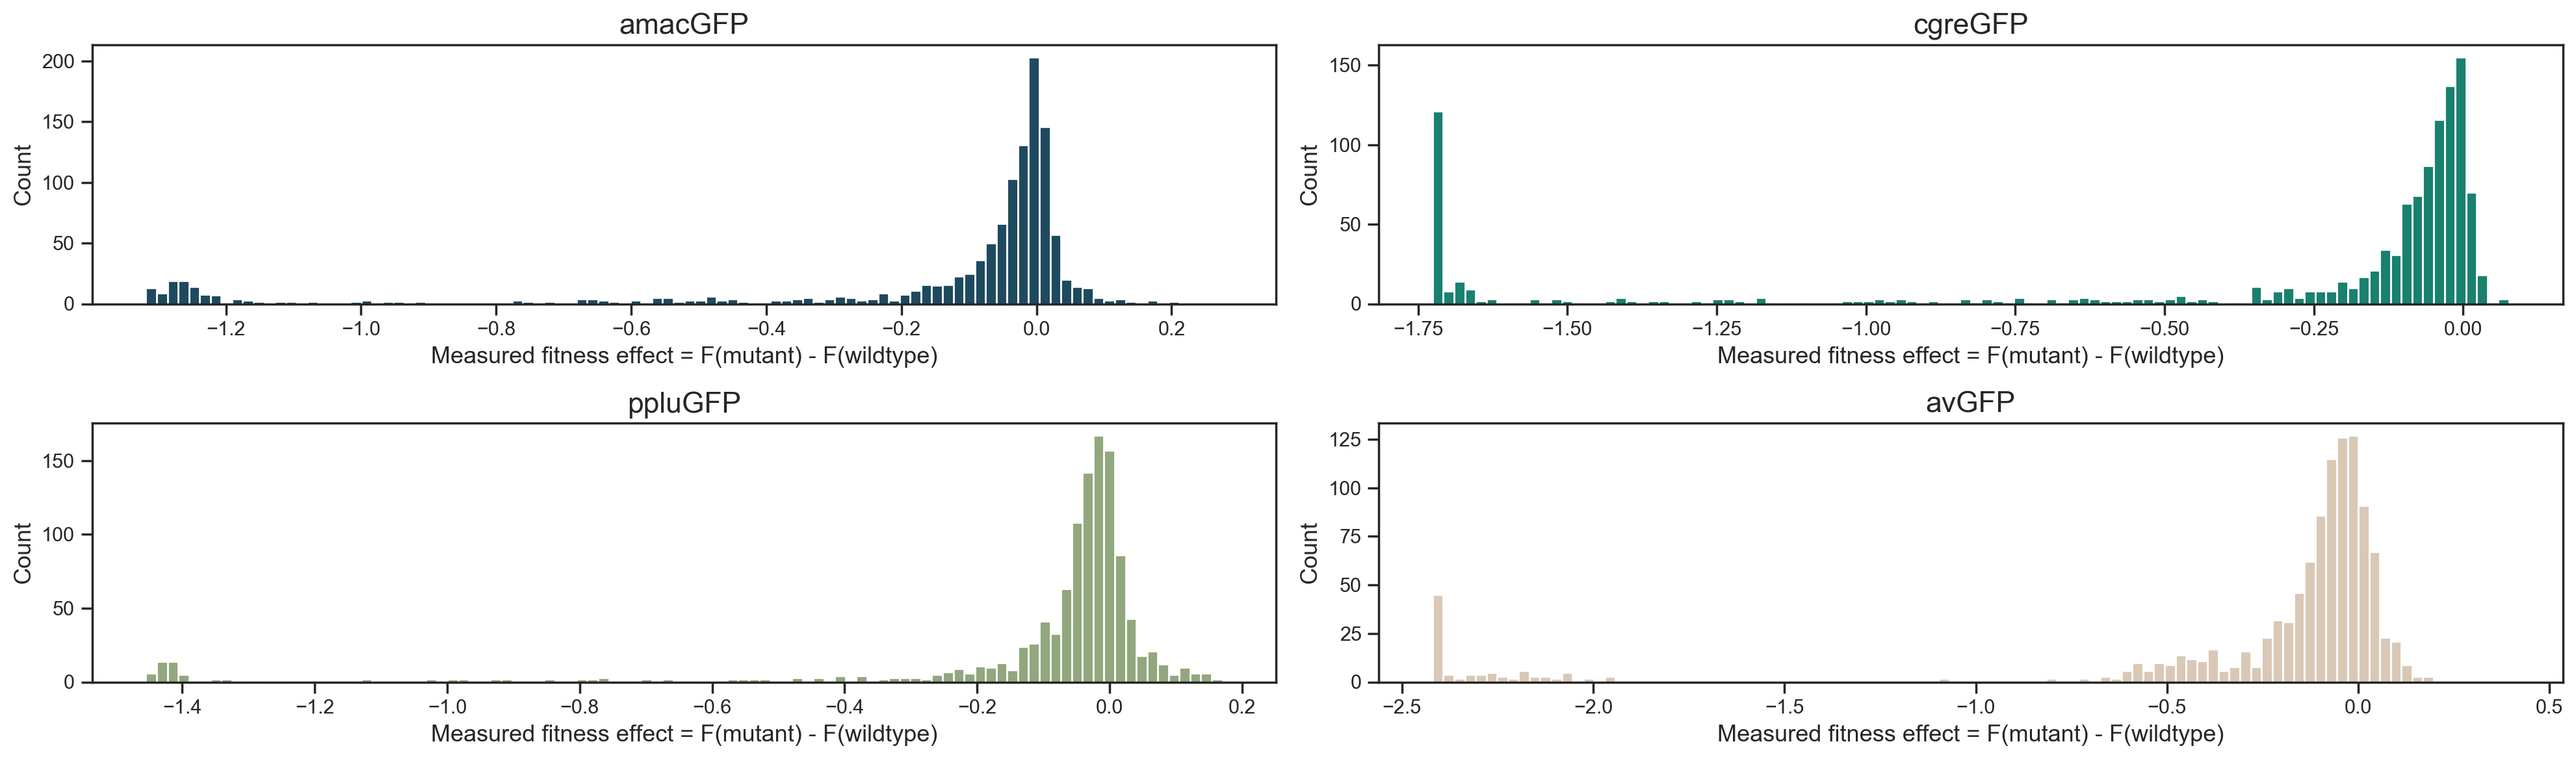

In [3]:
axes = subplots(height=3, width=10, nplots=4, nplots_per_row=2)
for ax,gene in zip(axes, ['amac', 'cgre', 'pplu', 'av']):
    plt.sca(ax)
    plt.hist(data_aa[eval(gene+'_mask') & singles_mask]['measured_effect'], bins=100, color=colors[gene])
    label_plot_axis(t=gene+'GFP', x='Measured fitness effect = F(mutant) - F(wildtype)', y = 'Count')
plt.tight_layout()

### Impact of mutations on buried vs. exposed residues
Buried sites are more sensitive to mutation, in all genes.

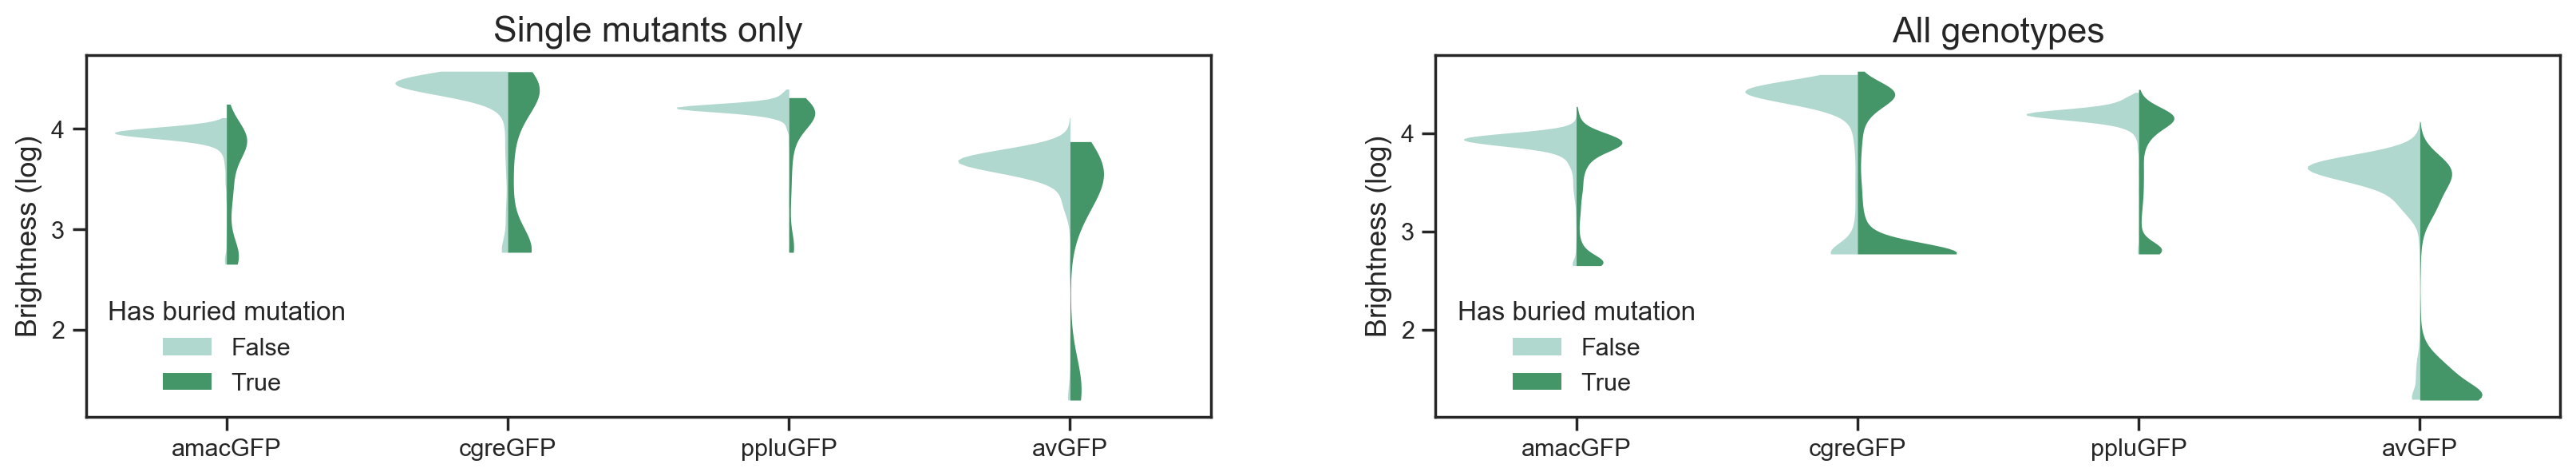

In [11]:
plt.figure(figsize=[20,3], dpi=200)
plt.subplot(1,2,1)
sns.violinplot(data=data_aa[~amacV14L_mask & singles_mask], x='gene', y='brightness', hue='has_buried_mutation', 
               split=True, linewidth=0, palette='BuGn', cut=0)
label_plot_axis(t='Single mutants only', y='Brightness (log)')
plt.legend(frameon=False, title='Has buried mutation')
plt.subplot(1,2,2)
sns.violinplot(data=data_aa[~amacV14L_mask], x='gene', y='brightness', hue='has_buried_mutation', split=True,
              linewidth=0, palette='BuGn', cut=0)
label_plot_axis(t='All genotypes', y='Brightness (log)')
plt.legend(frameon=False, title='Has buried mutation')

### Effects of different amino acids

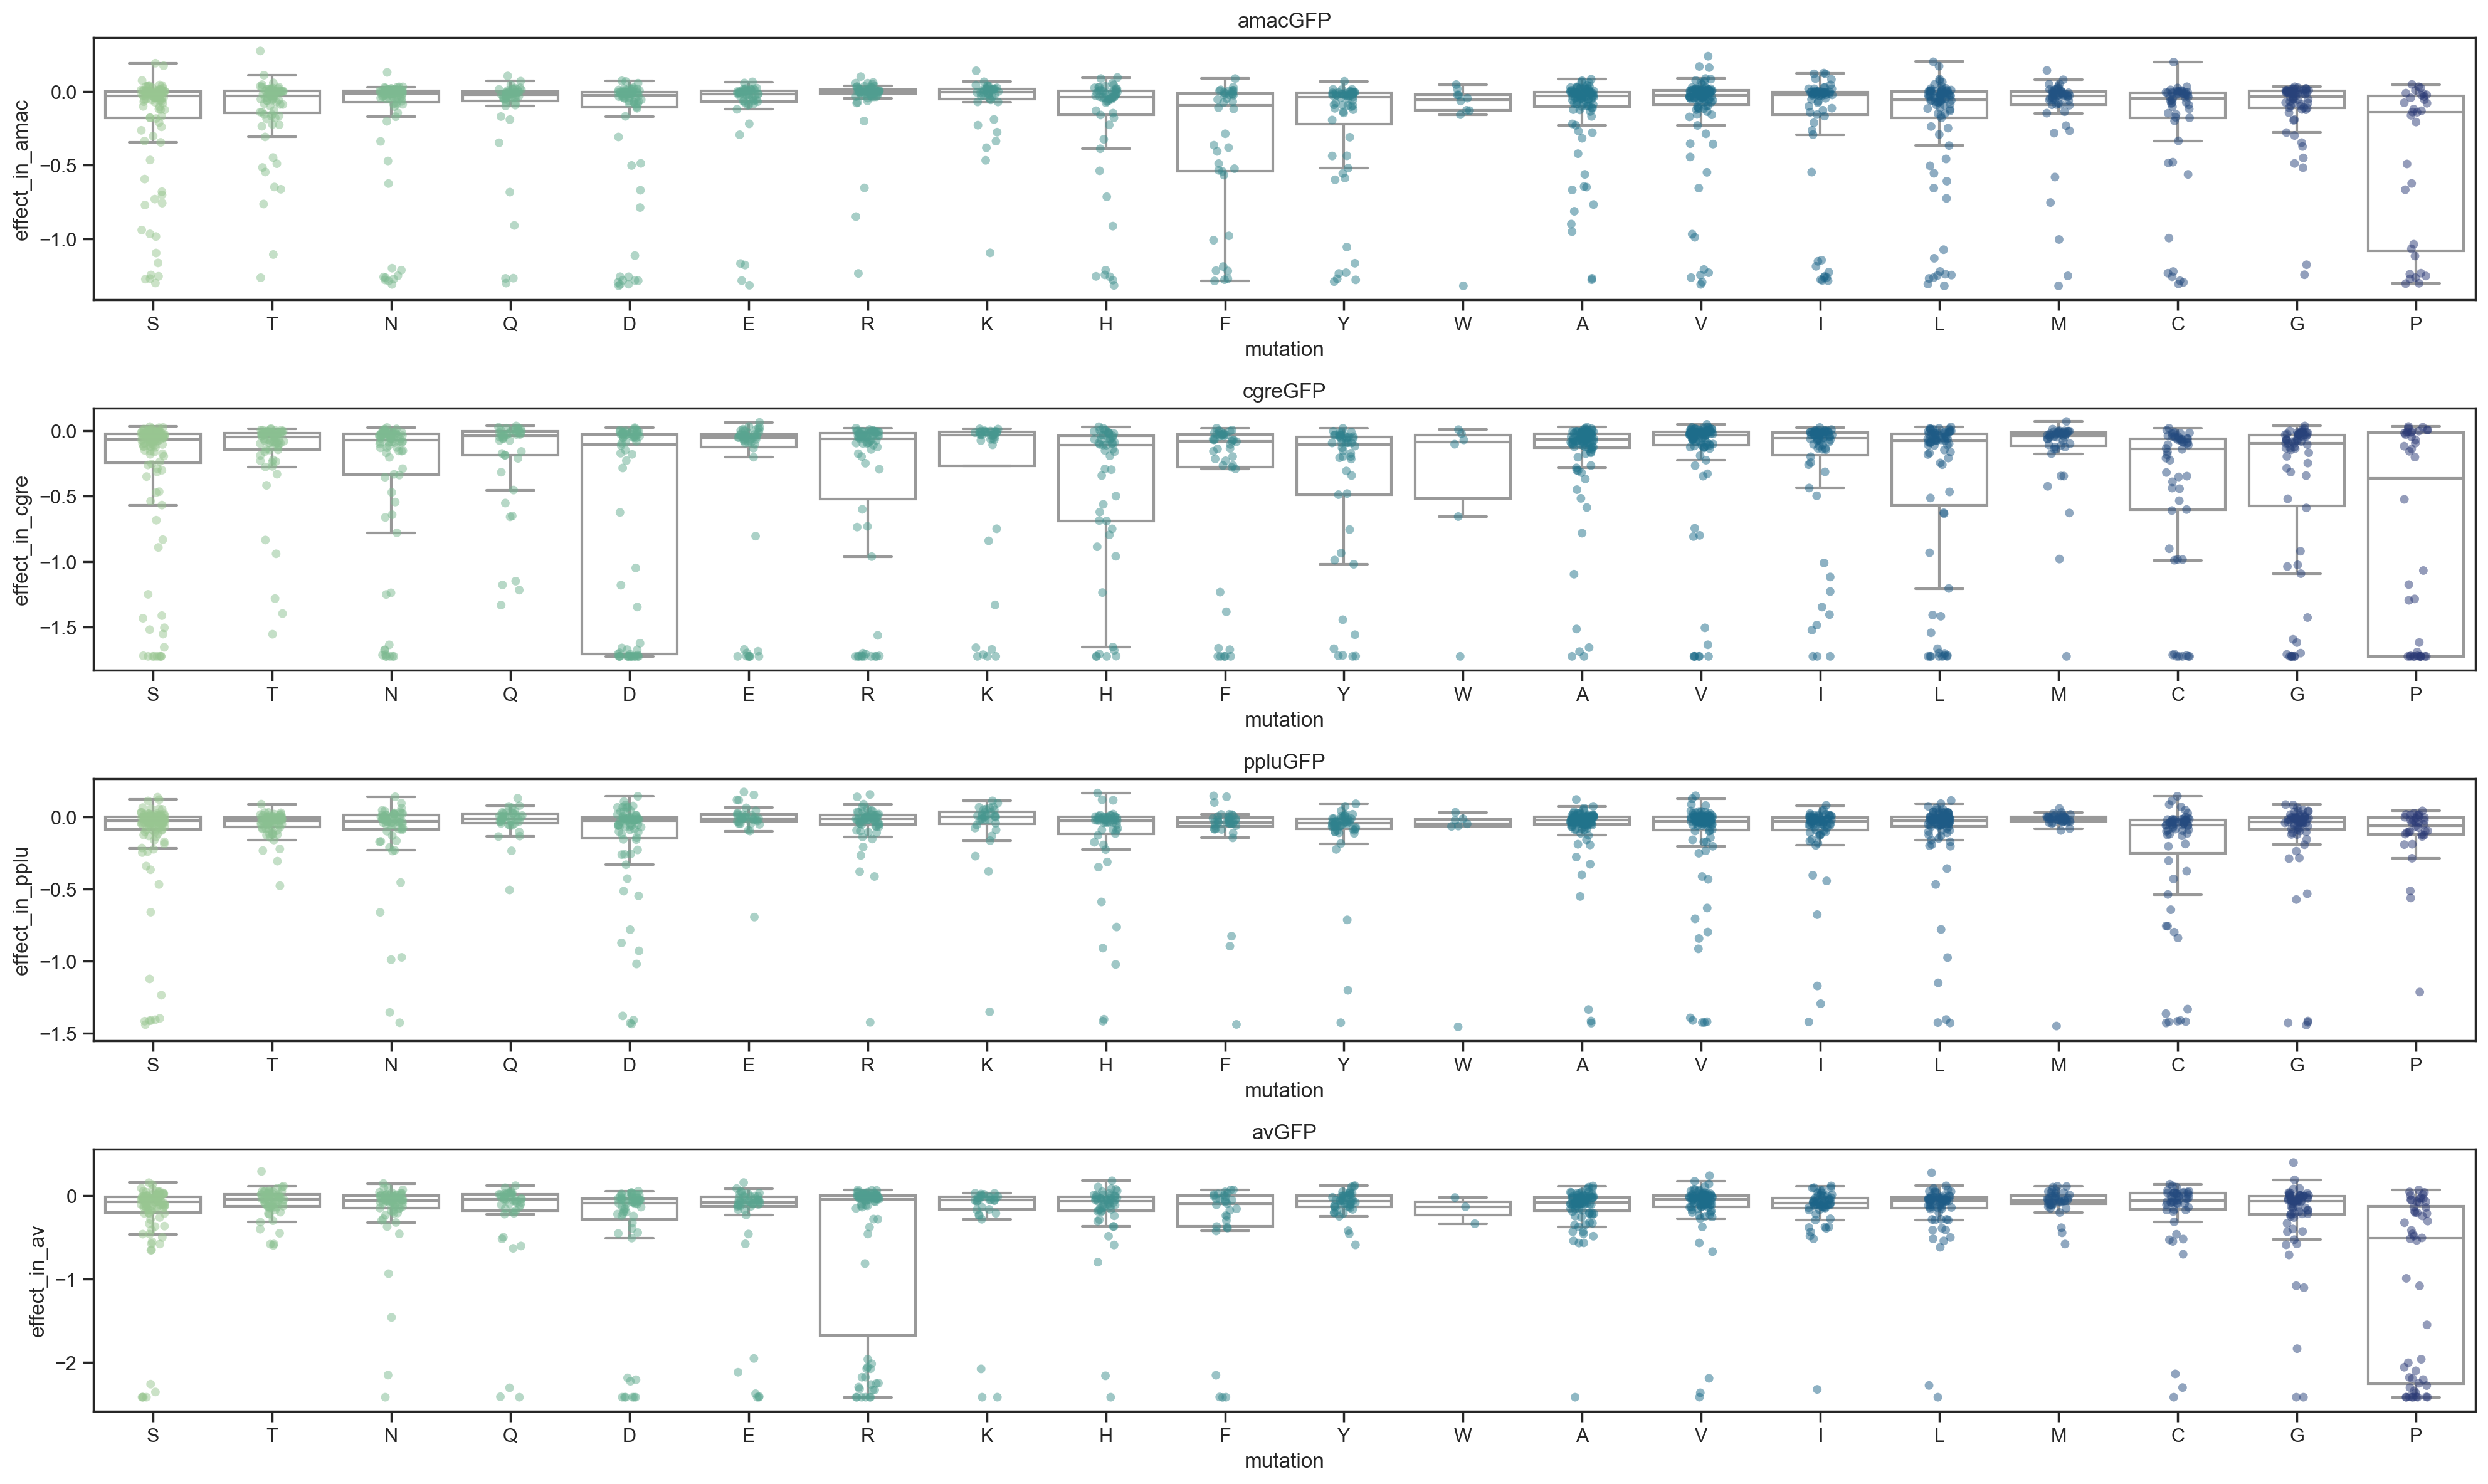

In [12]:
axes = subplots(height=3, width=20, nplots=4, nplots_per_row=1)
for ax,gene in zip(axes, ['amac','cgre','pplu', 'av']):
    plt.sca(ax)
    sns.boxplot(data=df_effects_singles[df_effects_singles['mutation']!='.'], x='mutation', y='effect_in_'+gene,
                color='white', fliersize=0, order='STNQDERKHFYWAVILMCGP')
    sns.stripplot(data=df_effects_singles[df_effects_singles['mutation']!='.'], x='mutation',y='effect_in_'+gene,
                 alpha=0.5, order='STNQDERKHFYWAVILMCGP', palette='crest')
    plt.title(gene+'GFP')
plt.tight_layout()

#### Mutations are slightly worse when the amino acid type is changed

In [6]:
aatype_to_aa = {'aliphatic':'AILMV', 'aromatic':'HFWY', 'positive_charge':'RHK', 'negative_charge':'DE',
                   'polar_uncharged':'STNQ', 'other':'CGP'}
aa_to_aatype = {aa : aatype for aatype in aatype_to_aa for aa in aatype_to_aa[aatype]}

amac MannwhitneyuResult(statistic=122638.0, pvalue=0.0016387890363361837)
cgre MannwhitneyuResult(statistic=90098.5, pvalue=1.0455078674812603e-14)
pplu MannwhitneyuResult(statistic=104501.0, pvalue=9.981719076990777e-06)
av MannwhitneyuResult(statistic=78801.0, pvalue=2.664119279359509e-10)


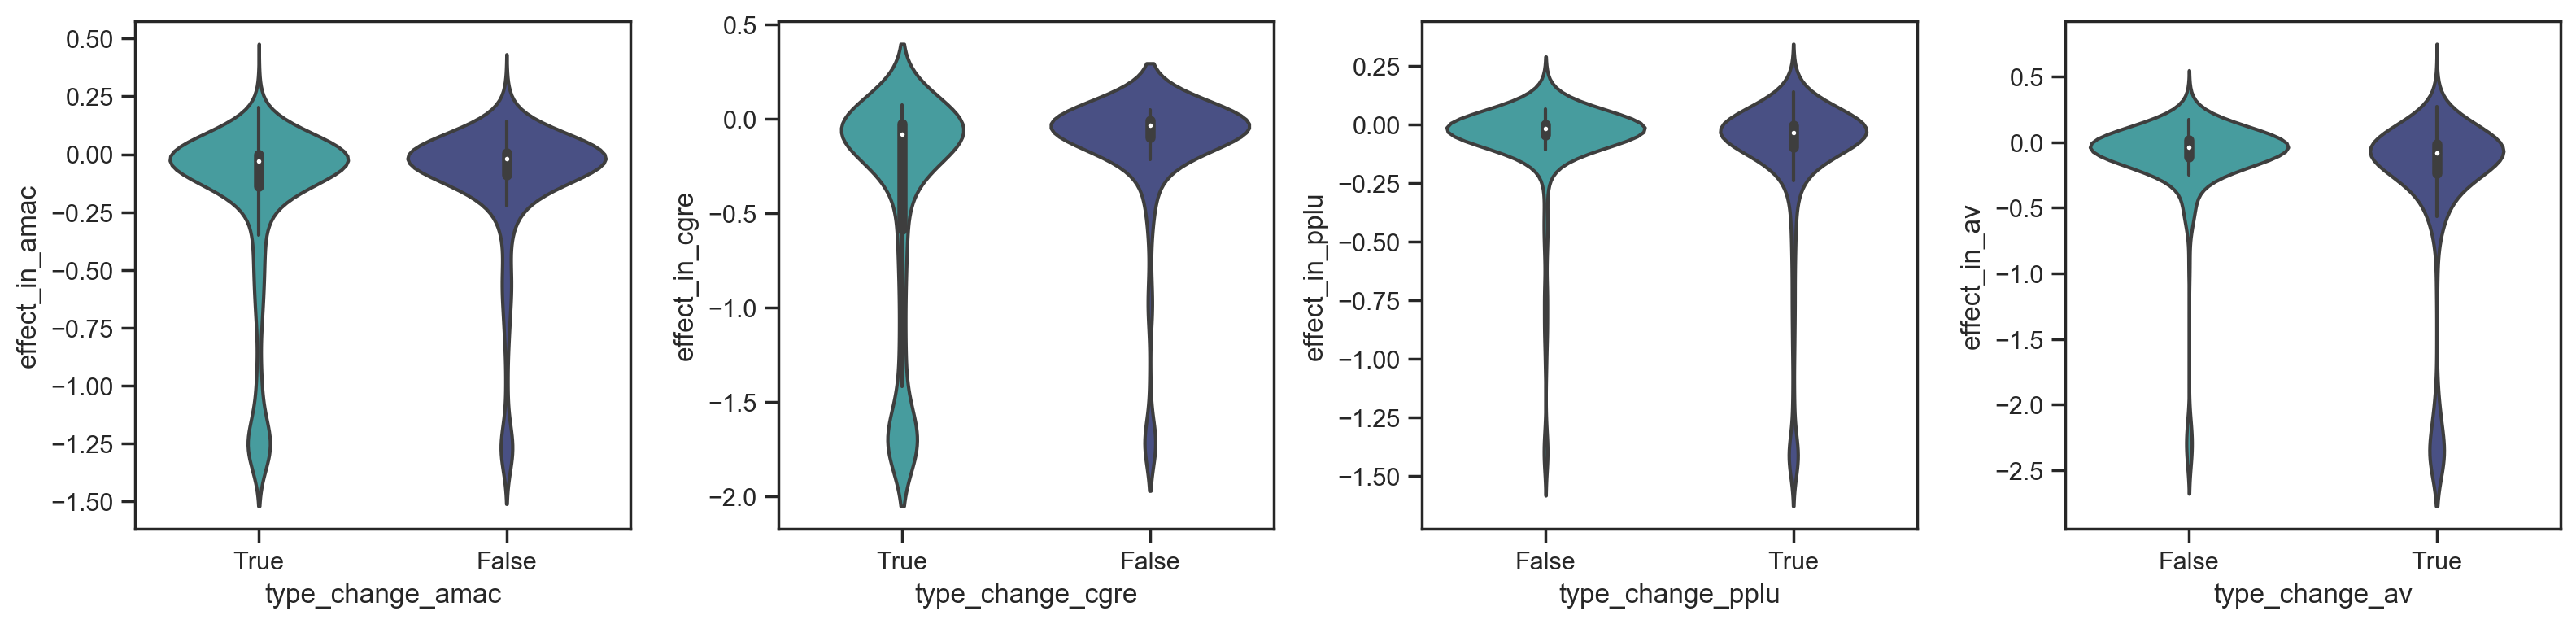

In [7]:
df = df_effects_singles.copy()

axes = subplots(nplots=4, nplots_per_row=4)
for ax, gene in zip(axes, ['amac', 'cgre', 'pplu', 'av']):
    df['type_change_'+gene] = df[['wt_state_'+gene, 'mutation']].apply(lambda x: 
                                            np.nan if x[1] in '*.' or x[0] in '*-' else
                                         True if aa_to_aatype[x[0]]!=aa_to_aatype[x[1]] else False, axis=1)
    a = df[df['type_change_'+gene]==True]['effect_in_'+gene].dropna()
    b = df[df['type_change_'+gene]==False]['effect_in_'+gene].dropna()
    print(gene, scipy.stats.mannwhitneyu(a,b))
    
    plt.sca(ax)
    sns.violinplot(data=df[df['effect_in_'+gene].notnull()], y='effect_in_'+gene, 
                   x='type_change_'+gene, palette='mako_r')
plt.tight_layout()

# Distribution of fitnesses by number of mutations

In [8]:
def get_fitnesses_by_nmut(gene, n):
    wt = data_nt[eval(gene+'_mask_nt') & wt_mask_nt]['log_brightness']
    muts = [data_aa[eval(gene+'_mask') & (data_aa['n_mut']==i)]['brightness'] for i in range(1,n)]
    labels = ['WT\nn = %s' % str(len(wt))]
    labels.extend(['%s mutations,\nn = %s' % (i, len(muts[i-1])) for i in range(1,n)])

    plt.violinplot([list(wt)]+[list(x) for x in muts], showmedians=True, showmeans=False)
    label_plot_axis(t=gene+'GFP', y='Brightness (log)')
    plt.xticks(range(1,n+1), labels)

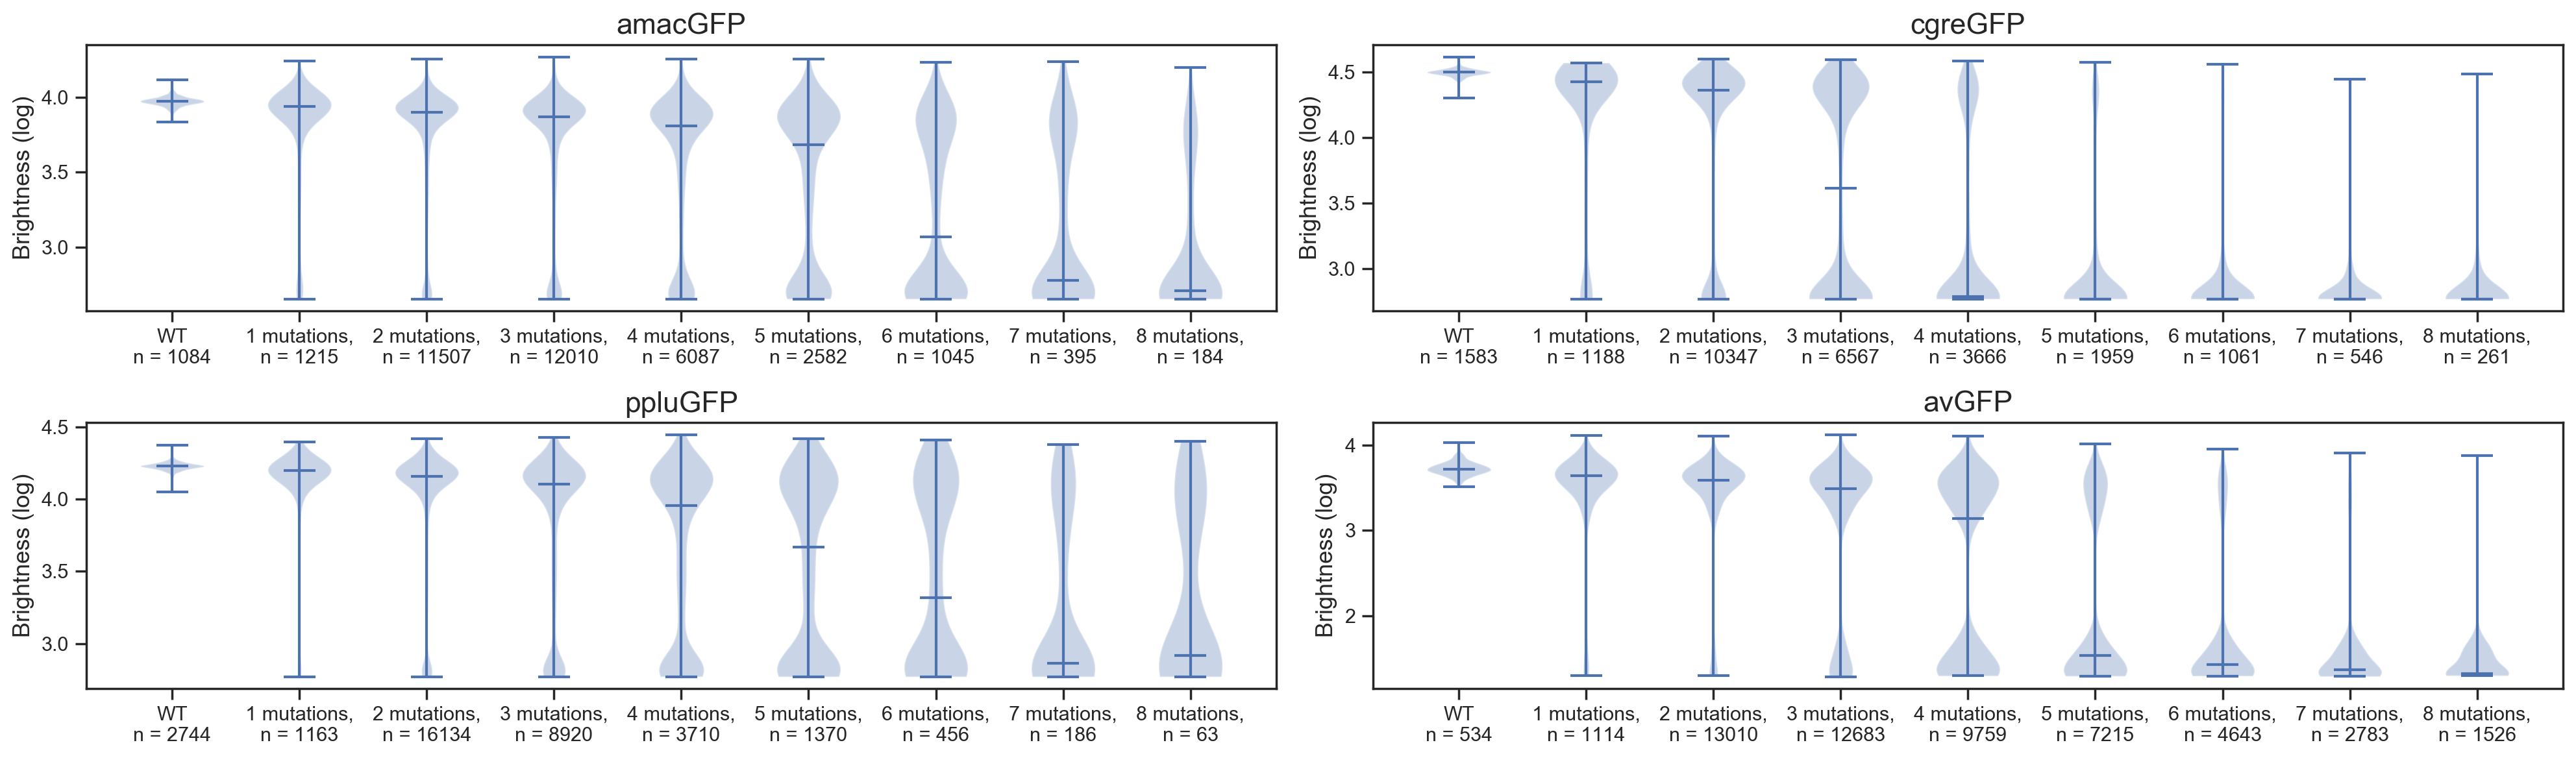

In [9]:
axes = subplots(height=3, width=10, nplots=4, nplots_per_row=2)
for ax,gene in zip(axes, ['amac', 'cgre', 'pplu', 'av']):
    plt.sca(ax)
    get_fitnesses_by_nmut(gene, 9)
plt.tight_layout()

In [17]:
def cheesescapes(n=9, col='brightness', cm='BuGn', pad=0.15, center=(0,0)):
#     cm = plt.get_cmap(cmap)
    
    plt.scatter([center[0]]*2,[center[1]]*2, c=[0,1], cmap=cm)
    plt.colorbar(orientation='vertical', label='Median brightness', pad=pad)
    
    medians = {}
    for i in range(n):
        n_mask = data_aa_scaled['n_mut']==i
        medians[i] = [data_aa_scaled[amac_mask & n_mask][col].median() * 255, 
                      data_aa_scaled[cgre_mask & n_mask][col].median() * 255,
                      data_aa_scaled[pplu_mask & n_mask][col].median() * 255,
                      data_aa_scaled[av_mask & n_mask][col].median() * 255]
    x = 2
    for i in range(n)[::-1]:
        if i==n-1:
            labels = ['\n\n\namacGFP','cgreGFP','ppluGFP2','avGFP']
        else:
            labels = ['','','','']
        c = cm([int(j) for j in medians[i]])
        plt.pie([1,1,1,1], radius=(x+i)/10, colors=c, labels=labels, wedgeprops={'linewidth':0.5,'edgecolor':'w'},
               startangle=-45, center=center, textprops={'fontsize': 12})
        
        c2 = cm(int(255 - medians[i][0]))
        if i == 8:
            plt.text((x+i)/10 - 0.1 + center[0], 0 + center[1], '8 mutations',
                horizontalalignment='left', verticalalignment='center', color=c2, weight='semibold')
        else:
            plt.text((x+i)/10 - 0.1 + center[0], 0 + center[1], i,
                horizontalalignment='left', verticalalignment='center', color=c2, weight='semibold')

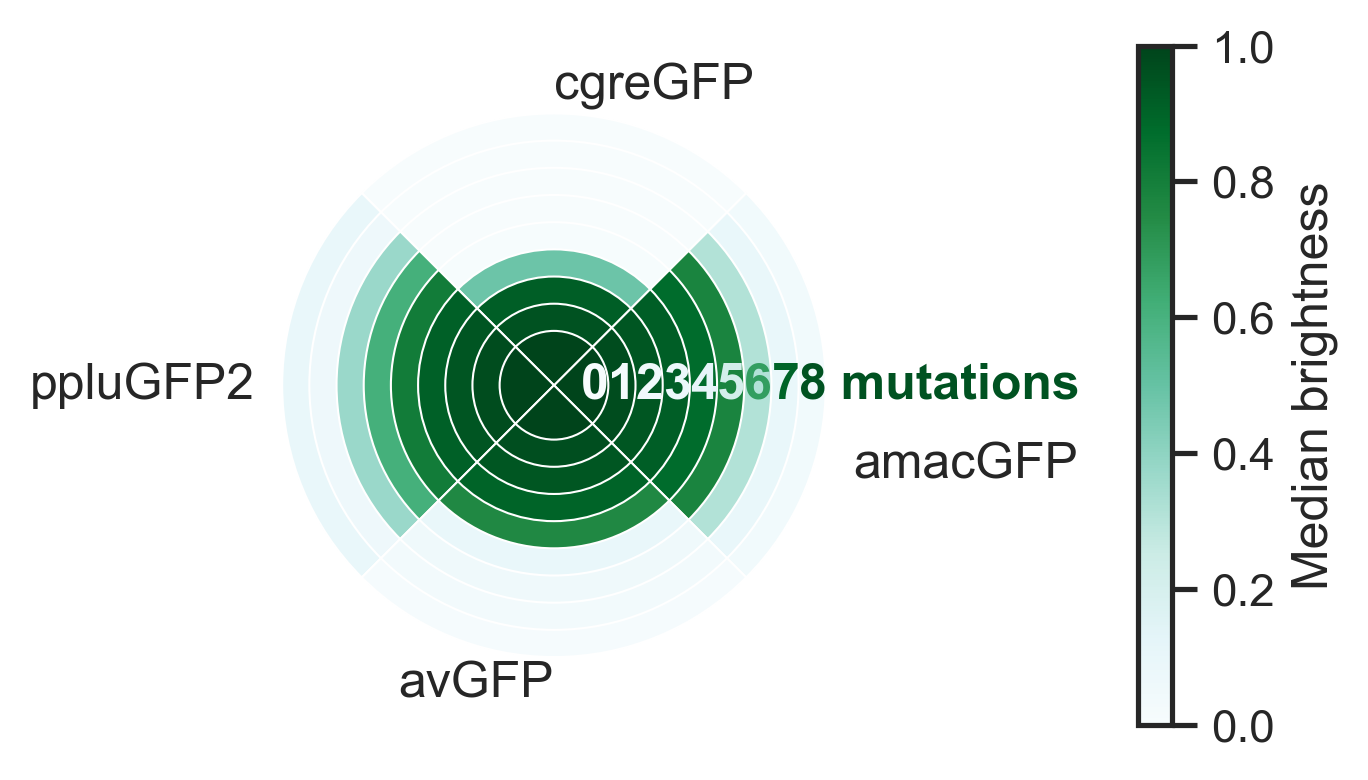

In [22]:
plt.figure(figsize=[7,3], dpi=300)
cheesescapes(cm=matplotlib.cm.BuGn)
plt.savefig(os.path.join(figures_folder, 'cheesescapes.png'), dpi=300)

# Fraction of bright and dark genotypes at each distance

In [50]:
from scipy.optimize import curve_fit

def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)

def fit_sigmoid(xdata, ydata, mid_guess):
    p0 = [max(ydata), mid_guess, 1, min(ydata)]
    popt, pcov = curve_fit(sigmoid, xdata, ydata, p0, maxfev=10000)
    return popt

In [112]:
def get_wt_and_dark(gene, n, data_nt=data_nt, data_aa=data_aa, plot=False):
    if gene=='amacV14LGFP':
        wt = data_nt[(data_nt.gene=='amacGFP') & (data_nt.aa_genotype_native=='V11L')]
    else:
        wt = data_nt[(data_nt.gene==gene) & (data_nt.aa_genotype_native=='wt')]
        
    wt_mean = wt['log_brightness'].mean()
    wt_std = wt['log_brightness'].std()
    
    if gene=='amacV14LGFP':
        muts = {i : data_aa[(data_aa.gene=='amacGFP') & (data_aa.aa_genotype_pseudo.str.contains('V14L')) &
                            (data_aa.n_mut==i+1)]['brightness'] for i in range(1,n)}
    else:
        muts = {i : data_aa[(data_aa.gene==gene) & ~(data_aa.aa_genotype_pseudo.str.contains('V14L'))
                            & (data_aa.n_mut==i)]['brightness'] for i in range(1,n)}
        
        
    # dark genotypes
    threshold = 3 if gene=='avGFP' else gate_borders_log[gene.replace('GFP','').replace('V14L','')][0]
    ndark = {i : len([x for x in muts[i] if x < threshold]) for i in muts}    
    
    # wt-level genotypes
    nbright = {i : len([x for x in muts[i] if x >= wt_mean-2*wt_std]) for i in muts}
    
    # table
    table = pd.DataFrame({'gene' : gene, 'n_mut' : range(1,n), 
                          'n_total' : [len(muts[i]) for i in muts] , 
                          'n_dark' : [ndark[i] for i in range(1,n)] ,
                          'n_bright' : [nbright[i] for i in range(1,n)] })
    table['f_dark'] = table['n_dark'] / table['n_total']
    table['f_bright'] = table['n_bright'] / table['n_total']
    
    if plot==True:
        plt.axhline(0.5, color='crimson', linestyle=':')
        
        # plot dark
        plt.scatter(range(0,n), [0]+list(table['f_dark']), color='k')
        popt = fit_sigmoid(xdata = list(range(0,n)), 
                           ydata = [0]+list(table['f_dark']), mid_guess=4)
        x = np.linspace(0, n-1, n*100+1)
        y = sigmoid(x, *popt)
        plt.plot(x,y, color='k', linewidth=2)

        LD50 = min(y, key=lambda x:abs(x-0.5))
        LD50 = x[list(y).index(LD50)]
        plt.axvline(LD50, color='k', linestyle=':', label=f'Dark (LD50 {round(LD50,1)})')

        # plot bright
        plt.scatter(range(0,n), [1]+list(table['f_bright']), color='w', edgecolor='k')
        popt = fit_sigmoid(xdata = list(range(0,n)), 
                           ydata = [1]+list(table['f_bright']), mid_guess=4)
        x = np.linspace(0, n-1, n*100+1)
        y = sigmoid(x, *popt)
        plt.plot(x,y, color='g', linewidth=2)

        LD50 = min(y, key=lambda x:abs(x-0.5))
        LD50 = x[list(y).index(LD50)]
        plt.axvline(LD50, color='g', linestyle=':', label=f'WT-bright (LD50: {round(LD50,1)})')
    
        plt.legend(frameon=False)
        plt.title(names[gene])
        plt.xticks(range(0,n), range(0,n))
        plt.xlabel('Mutations')
        plt.ylabel('Fraction of genotypes')
    
    return table

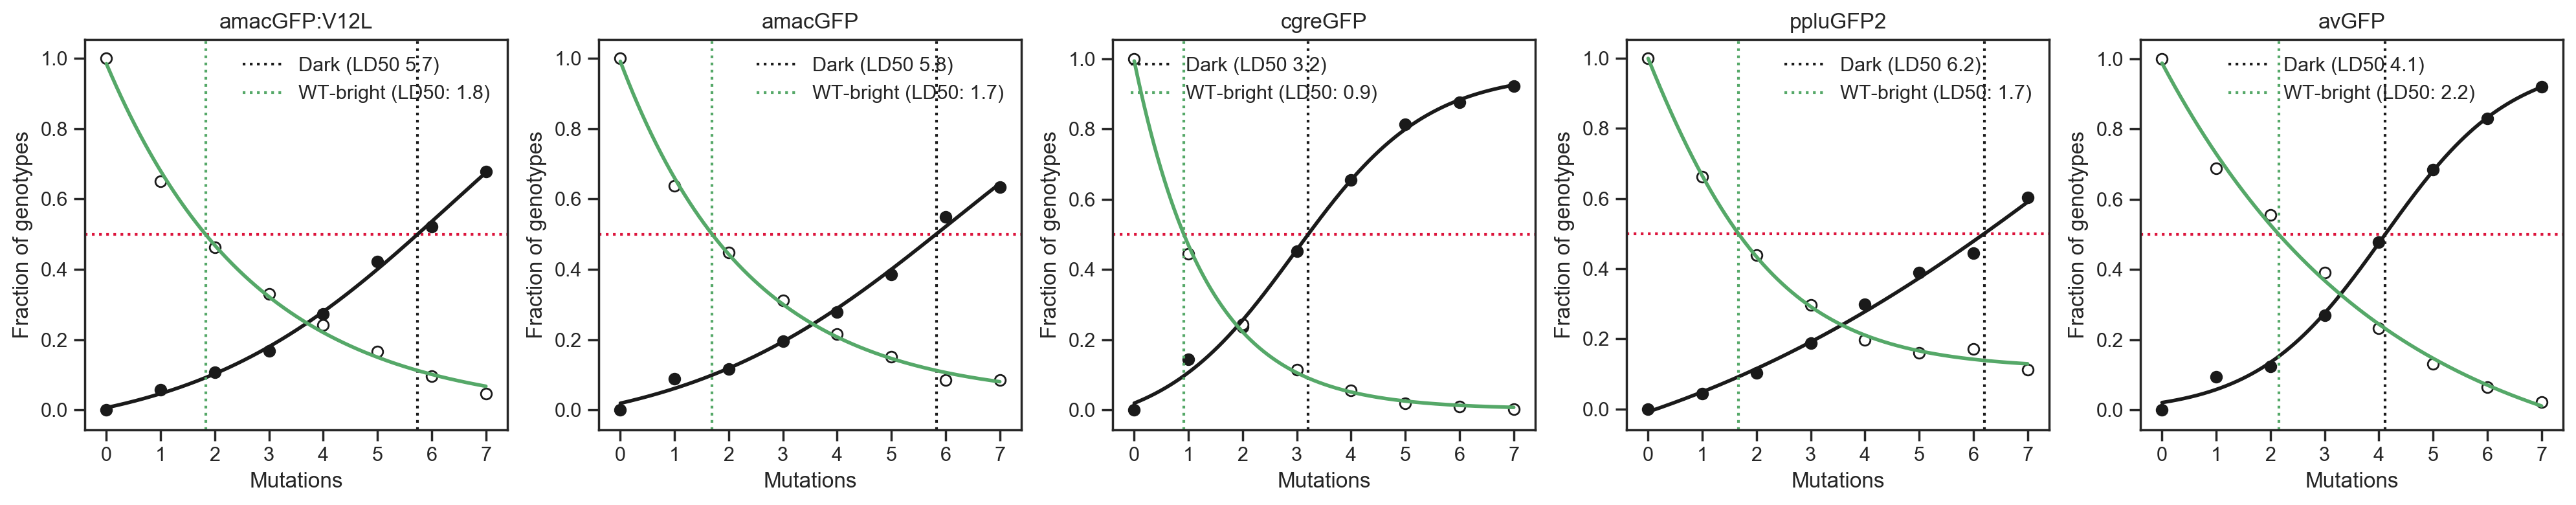

In [113]:
axes = subplots(nplots=5, nplots_per_row=5, )

df_fractions = pd.DataFrame(columns = ['gene','n_mut', 'n_total','n_dark','n_bright','f_dark','f_bright'])

for ax,gene in zip(axes, ['amacV14LGFP', 'amacGFP', 'cgreGFP', 'ppluGFP', 'avGFP']):
    plt.sca(ax)
    df = get_wt_and_dark(gene, 8, plot=True)
    df_fractions = pd.concat([df_fractions, df])
    
plt.tight_layout()

In [111]:
df_fractions

,gene,n_mut,n_total,n_dark,n_bright,f_dark,f_bright
0,amacV14LGFP,1,1068,62,694,0.058052,0.649813
1,amacV14LGFP,2,5621,603,2602,0.107276,0.462907
2,amacV14LGFP,3,3010,506,993,0.168106,0.329900
3,amacV14LGFP,4,1313,359,317,0.273420,0.241432
4,amacV14LGFP,5,534,225,89,0.421348,0.166667
5,amacV14LGFP,6,207,108,20,0.521739,0.096618
6,amacV14LGFP,7,84,57,4,0.678571,0.047619
0,amacGFP,1,1214,109,773,0.089786,0.636738
1,amacGFP,2,10439,1223,4668,0.117157,0.447169
2,amacGFP,3,6389,1252,1994,0.195962,0.312099
